# 問題1 各手法の実行

In [1]:
import keras

Using TensorFlow backend.


# Keras LSTM

In [3]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import  Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU
from keras.datasets import imdb

max_features = 20000#ワード数

maxlen = 80 #文章のながさ
batch_size = 32

print('Loading data...')
#max_featuresの数だけ言葉を抽出する
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
print(x_train[1200])

[   33    45   249     6   762     7   363 13567    78  5247     5  1180
   987    49     2   123    38    68   362    70    30    11     4  7603
   449   591     4 13276   486    16    60    78    13   784    14   538
    54    50     9    66   966  1020   362  5247   156     5  2719    46
    50 11749    68 11805     8    28  1023     5    14   595   266   367
    10    10   339  1206    32   138   286  1924  5193    11    12     2
  1296    11   722     9   170   180     4  3480]


In [5]:
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [12]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train, batch_size=batch_size, epochs=1,
         validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('test score:', score)
print('Test accuracy:', acc)

W0107 12:11:58.312185 4680316352 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0107 12:11:58.322842 4680316352 deprecation.py:506] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Build model...


W0107 12:11:58.633134 4680316352 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0107 12:11:58.660495 4680316352 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0107 12:11:58.668000 4680316352 deprecation.py:323] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 15s 612us/step
test score: 0.4384059209442139
Test accuracy: 0.8276


LSTMに関しては1エポック134秒かかり、テストデータに対する精度は82.8%

# GRU 

In [6]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train, batch_size=batch_size, epochs=1,
         validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('test score:', score)
print('Test accuracy:', acc)

W0121 19:39:01.534275 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0121 19:39:01.605915 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0121 19:39:01.627089 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build model...


W0121 19:39:01.770965 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0121 19:39:01.795185 4577437120 deprecation.py:506] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0121 19:39:02.046736 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0121 19:39:02.080147 4577437120 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/pyt

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 14s 553us/step
test score: 0.3988821544456482
Test accuracy: 0.82328


GRUに関しては1エポック110秒かかり、テストデータに対する精度は82.3%

# Simple RNN

In [8]:
from keras.layers import SimpleRNN
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train, batch_size=batch_size, epochs=1,
         validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 7s 297us/step
test score: 0.6726504361724853
Test accuracy: 0.56996


SimpleRNNに関しては1エポック61秒かかり、テストデータに対する精度は57.0%

# モデルの説明

In [14]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt


入力は、動画数 * フレーム数　* h * wで、出力も同じ形式となる</br>
出力は入力のフレームの一つあとのフレームを出力する</br>

今回トレーニング時に置いては、1000動画,15フレームでトレーニングさせる。推論時に行いたいことは、６枚のフレームからそれに続く16のフレームを予測させる。この際、６毎で推論行なうと、出力の６枚目のフレームが７枚目のフレームの予測値となるため、これを７枚目に追加する。今度はこの７枚で予測を行い、出力結果を８枚目に追加する。これを１６回繰り返す。

In [15]:
seq = Sequential()
#40 x 40
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                  input_shape=(None, 40, 40, 1),
                  padding='same', return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                  padding='same', return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))

seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))

seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
              activation='sigmoid', padding='same',
              data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

seq.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
__________

# ConvLSTM2D

# 動画を生成する関数

In [21]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    #n_samples = サンプル動画数
    #n_frames = 一動画あたりのフレーム数
    
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1),
                           dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                             dtype=np.float)
    
    for i in range(n_samples):
        #移動するsquaresの数をランダムに決める:3-7
        n = np.random.randint(3, 8)
        
        #スクエアをフレームに割り振りたい
        #jはスクエアのインデックス
        for j in range(n):
            #最初のポジション:20-59
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            
            #動く方向:-1, 0, 1
            #フレームごとに一定方向に動く
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            
            #squareの大きさ
            w = np.random.randint(2, 4)
            
            #フレームtごとに固定したスクエアjの位置を決める
            for t in range(n_frames):
                #e.g. directionx=1: f=0->20, f=1->21, f=2->22...
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                
                #フレームの生成
                noisy_movies[i, t, x_shift - w : x_shift + w,
                            y_shift - w : y_shift + w] += 1
                
                #スクエア線の端に濃淡を与える
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t, x_shift - w - 1: x_shift + w + 1,
                                y_shift - w -1 : y_shift + w + 1,
                                0] += noise_f * 0.1

                #t+1が次のフレーム正解となる
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w : x_shift + w,
                              y_shift - w : y_shift + w, 0] += 1
                
    #40 x 40にカットする
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies  = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies
            

In [22]:
arr = np.array([1,2,3,4,5])
arr[:]

array([1, 2, 3, 4, 5])

In [23]:
noisy_movies, shifted_movies = generate_movies(n_samples=1)
print(noisy_movies.shape)

(1, 15, 40, 40, 1)


(40, 40)


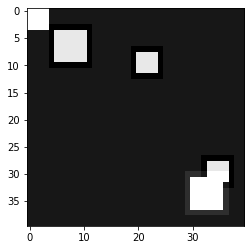

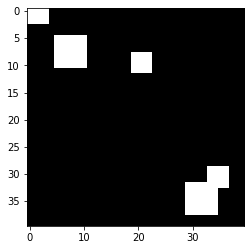

In [32]:
import matplotlib.pyplot as plt
print(noisy_movies[0, 0, :, :, 0].shape)
frame = noisy_movies[0, 0, :, :, 0]
plt.imshow(frame, cmap="gray")
plt.show()
shifted_frame = shifted_movies[0, 0, :, :, 0]
plt.imshow(shifted_frame, cmap="gray")
plt.show()

# トレーニング

In [34]:
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
       epochs=5, validation_split=0.05)



Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 1511s 2s/step - loss: 0.2428 - val_loss: 0.0803
Epoch 2/5
950/950 [==============================] - 1513s 2s/step - loss: 0.0321 - val_loss: 0.0163
Epoch 3/5
950/950 [==============================] - 1586s 2s/step - loss: 0.0061 - val_loss: 0.0051
Epoch 4/5
950/950 [==============================] - 1595s 2s/step - loss: 0.0024 - val_loss: 0.0025
Epoch 5/5
950/950 [==============================] - 1431s 2s/step - loss: 0.0011 - val_loss: 0.0010


# 予測

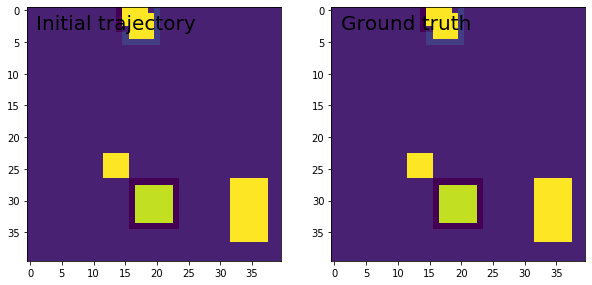

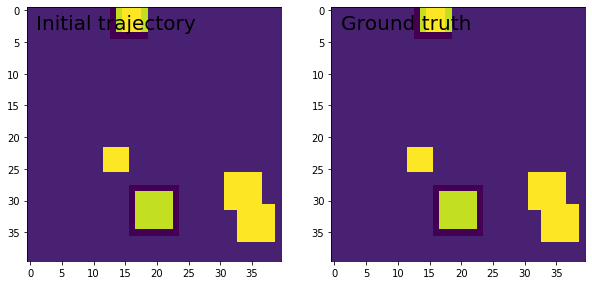

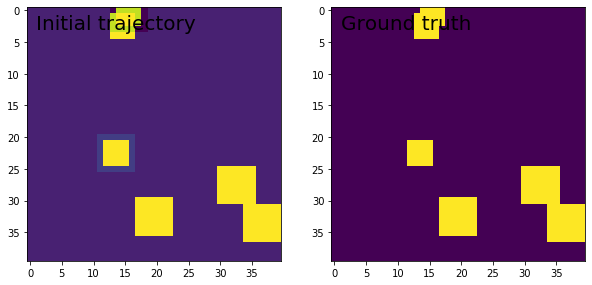

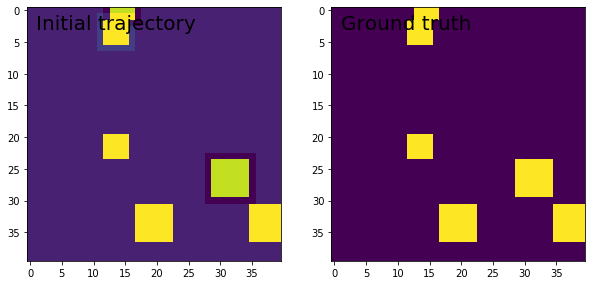

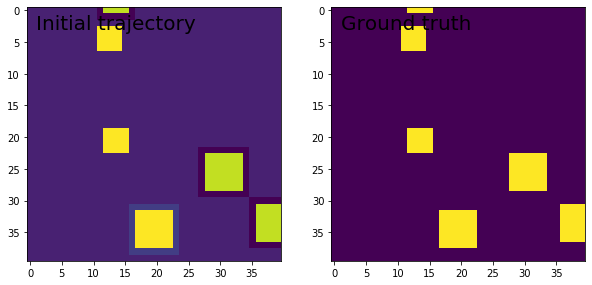

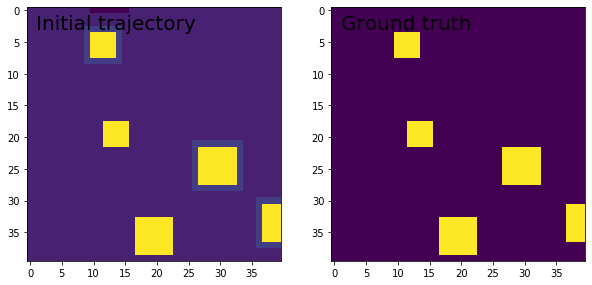

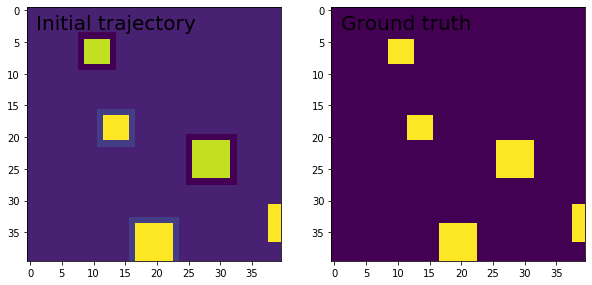

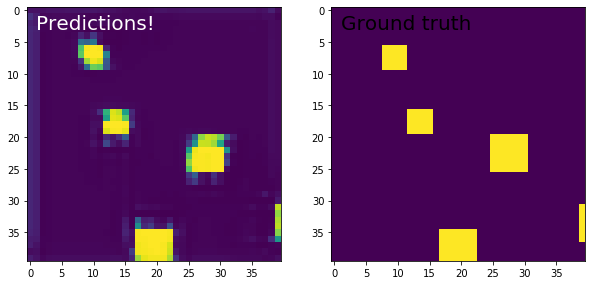

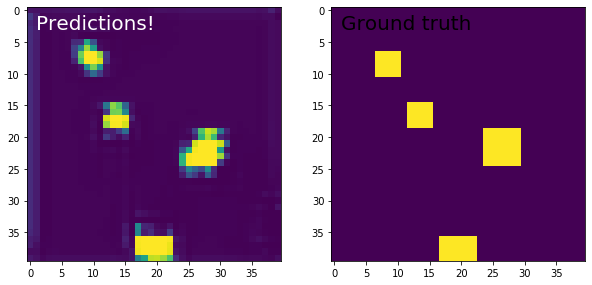

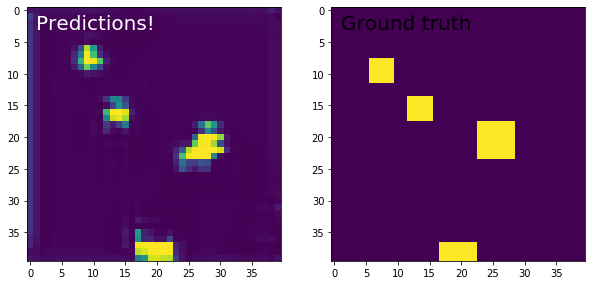

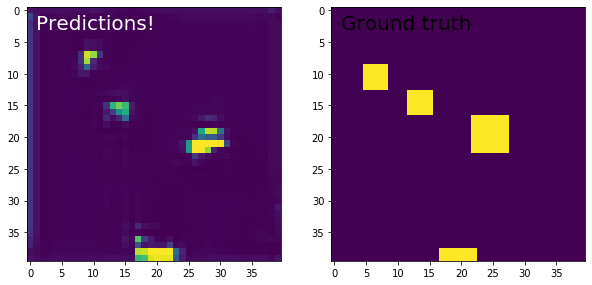

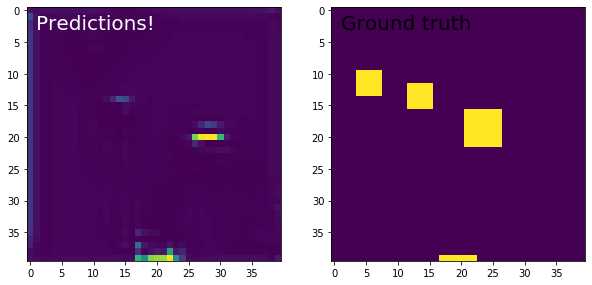

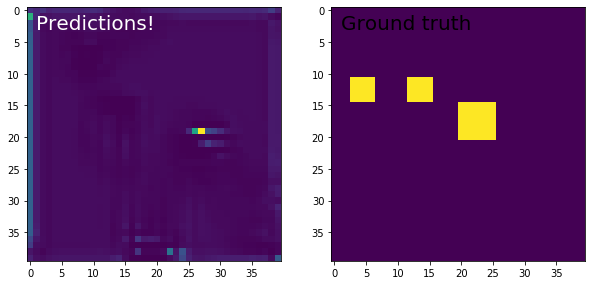

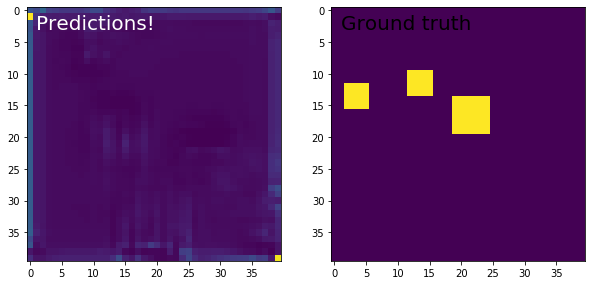

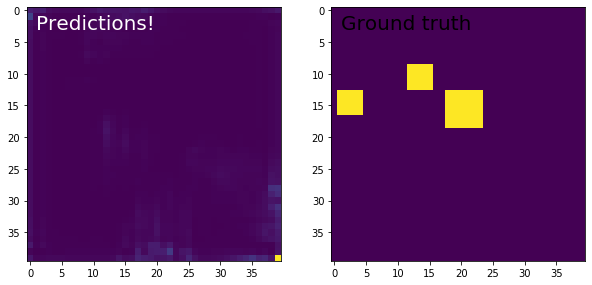

In [35]:
#1004番目のmovieでテスト
which = 1004
#7番目のフレームを予測させる
track = noisy_movies[which][:7, ::, ::, ::]
#7以降の16個を予測する
for j in range(16):
    #j=0の時の例:
    #6枚のフレームで推論を実行する
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    #７枚目フレームの予測である、出力の一番最後のフレームを取得
    new = new_pos[::, -1, ::, ::, ::]
    #7枚目としてトラックに追加
    track = np.concatenate((track, new), axis=0)
    

#groud truthと比較
track2 = noisy_movies[which][::, ::, ::, ::]

#フレームを１５枚表示する
#この時予測と正解両方を表示し、予測の既存の物と予測として加わった
#ものの見分けがつくようにする
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    
    #予測の既存の物と予測をplt.textでラベルづけする
    if i >= 7:
        ax.text(1, 3, 'Predictions!', fontsize=20, color='w')
    else:
        ax.text(1,3, 'Initial trajectory', fontsize=20)
     
    #i番目の予測フレームを表示
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    
    #正解にラベルづけ
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]
        
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))
    
    
    

    

# 問題3 他のクラスの説明

RNN: Recurrentレイヤーに対する基底クラス。<br>
SimpleRNNCell: SimpleRNNのCellクラス。<br>
GRUCell: GRUレイヤーのためのCellクラス。<br>
LSTMCell: LSTMレイヤーのためのcellクラス。<br>
StackedRNNCells: RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。効率的なstacked RNNを実装するために使われる。<br>
CuDNNGRU: CuDNNを利用した高速なGRU実装。TensorFlowバックエンドでGPU上でのみ動作する。<br>
CuDNNLSTM: CuDNNを利用した高速なLSTM実装。TensorFlowバックエンドでGPU上でのみ動作する。